# Chapter 2: Bioelectricity

```{caution} This book was initially prepared on short notice and is an ongoing, ever-evolving project. Many of the ideas, simulations, and visualizations here are incomplete, and most are missing citations. If you feel that I have neglected to cite the proper sources, please do not be offended. It is more than likely that I am in the processes of adding the relevant citations.
```

In [1]:
# Scientific computing
import pandas as pd
import numpy as np

# Web friendly plotting with Bokeh
from bokeh.models import ColorBar, ColumnDataSource, Title, BoxAnnotation, Span, Legend, LabelSet, CategoricalColorMapper
from bokeh.palettes import Viridis256, Magma256, Turbo256, Cividis256, Colorblind
from bokeh.plotting import figure, output_file, show
from bokeh.transform import linear_cmap, cumsum, CumSum
from bokeh.layouts import row, gridplot, layout
import bokeh.io
bokeh.io.output_notebook()

# Matplotlib, for when Bokeh fails
import matplotlib.pyplot as plt
from matplotlib import ticker

/home/noahguzman/anaconda3/lib/python3.7/site-packages/numpy/__init__.py:156: UserWarning: mkl-service package failed to import, therefore Intel(R) MKL initialization ensuring its correct out-of-the box operation under condition when Gnu OpenMP had already been loaded by Python process is not assured. Please install mkl-service package, see http://github.com/IntelPython/mkl-service
  from . import _distributor_init


Loading BokehJS ...

In /home/noahguzman/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In /home/noahguzman/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In /home/noahguzman/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.


In /home/noahguzman/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In /home/noahguzman/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In /home/noahguzman/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In /home/noahguzman/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In /home/noahguzman/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In [2]:
from IPython.display import YouTubeVideo

```{toggle}
$$
\require{color}
% Colorblind pallette
\definecolor{Indigo}{RGB}{51, 34, 136}
\definecolor{Cyan}{RGB}{136, 204, 238}
\definecolor{Teal}{RGB}{68, 170, 153}
\definecolor{Green}{RGB}{17, 119, 51}
\definecolor{Olive}{RGB}{153, 153, 51}
\definecolor{Sand}{RGB}{221, 204, 119}
\definecolor{Rose}{RGB}{204, 102, 119}
\definecolor{Wine}{RGB}{136, 34, 85}
\definecolor{Purple}{RGB}{170, 68, 153}
$$
```

## A Primer on Electricity

To understand the electrical phenomena of the nervous system, we first need to understand a few basic concepts from electromagnetism, the physics of electrical and magnetic phenomena. It turns out that the magnetic phenomena arising from the electrical activity of neurons have a negligible effect on that activity, so we can ignore them for most practical purposes. With that in mind, I won't be covering magnetism, only electricity. Specifically, I will only be covering *electrostatics*, an idealized branch of the study of electricity that assumes that electrical phenomena do not change rapidly over time. This assumption is of course false, but the idealization makes certain problems mathematically tractable.

### Electric Charges

All of the electrical phenomena and devices we experience on a daily basis, such as the phone in your pocket or the static shock you might feel when touching something after walking barefoot on carpet, arise from the presence of matter having the property of electric charge. You'll often see circular definitions of electric charge, such as the one on Wikipedia: "Electric charge is the physical property of matter that causes it to experience a force when placed in an electromagnetic field". Huh? If I need the concept of electric charge to understand what an electromagnetic field is, but the concept of an electric charge depends on understanding what an electromagnetic field is, how can I possibly understand either one?

The key is to forget such circular definitions, which only make sense once one already understands both concepts. All of the properties we assign to matter, including electric charge, are *relational* properties. Though we can assign relational properties to individual objects or entities, they cannot be defined or measured without reference to at least two objects or entities. We can only know that an object has the property of electric charge by observing its behavior in the presence of at least one other object, namely, the attraction or repulsion of the two objects. This behavior was first observed by the ancient Greeks, who noted that a piece of amber rubbed with fur could attract small, light objects. We now know that the electric charge of these macroscopic objects, as well as their attraction and repulsion, are due to the charge-carrying subatomic particles that constitute those objects, which also attract and repel each other. 

Charges that attract each other are said to be *opposite* or *unlike* while charges that repel each other said to be *like* charges. There are two kinds of charges, *positive* and *negative* charges. Positive and negative charges attract each other but repel charges of the same kind. How do we know if a charge is positive or negative? This is purely a matter of convention, a set of agreed upon rules. It was decided many decades ago that electrons (a type of charge-carrying subatomic particle) have one negative *elementary charge* unit, denoted $-1 e$, while protons (a different type of charge-carrying subatomic particle) have one positive elementary charge unit, $1e$. We can check whether molecules and other physical entities are attracted to or repelled by groups of protons or electrons to determine the sign of their total charge.

Why do electric charges attract or repel each other? To explain that in detail, we would need to get into special relativity and quantum mechanics, physics that I don't know well and even if I did, would be beyond the scope of these notes. Even if we can't tell a story about why electric charges repel and attract each other (i.e. the mechanisms of attraction and repulsion), we can at least describe how they do so. This description is in terms of the concept of an *electric field*.

Suppose I have an electric charge at a point in space. Then, if I were to bring another electric charge (often called a *test charge*, an idealized electric charge whose other electrical properties are ignored) into that space, the first charge would exert some force (either attractive or repulsive) on that second charge. The electric field is a mathematical device that tells us the direction and magnitude of the force that would the first charge would exert on that second test charge at every point in space. As we will cover in later chapters, mathematical entities with magnitude and direction are called *vectors*, and since the electric field assigns a vector representing the force exerted by an electric charge to every point in space, it is an example of a *vector field*. The word *field* just means "exists at every point in a particular space".

```{figure} efield.png
:name: efield

A diagram illustrating the electric fields resulting from different configurations of charges. Note the convention that electric force $\mathbf{E}$, called the *Coulomb force*, is directed from away from positive charges and toward negative charges. The direction of the field lines show that like charges repel each other while unlike charges attract.
```

Charge is measured in units called *Coulombs* which are a multiple of the elementary unit charge $e$. Whenever we have electric charges moving through space, we have an *electric current*. Electric currents have units of *amperes*, which are equivalent to Coulombs per second. In other words, measuring an electric current at a point in space tells us how many Coulombs of charge pass that point in a single second.

### Electric Potential

Electric potential tells us how much work we would have to do to move an electric charge from one point in space (called the *reference* point) through an existing electric field to another point in space within that field. You might think that this would depend on the path taken from one point to the other since the electric field varies in space, but it turns out that as long as the field does not vary in time, the path does not matter. In mathematical analyses of electrical systems, the reference point is often idealized to be at infinity. 

Of course, in real systems, we can't stick a wire out to infinity to measure this *absolute potential*, so we usually choose an arbitrary reference point within reach and measure all potentials with respect to that point. What we do is to take that arbitrary reference point, define its electric potential to be zero, and measure the potential of a given point with respect to that reference point. We can then find the potential difference, or *voltage*, between any two points by measuring their potential with respect to the reference point and then taking the difference between those potentials. As you can see, electric potential is *relational*, since we always need two points to measure it. Mathematically, we can calculate the electric potential of a system of charges using an operation from multivariable calculus called a *path integral*.

What is the real point of the concept of electric potential? Why do we care about it, measure it, calculate it? Electric potential is a convenient concept because it allows us to think about what electric charges are likely to do when placed within a field. Instead of having to think about how electric forces would act on a charge at each point in the field and trying to figure out the motion of the charge due to those forces, we can pretend that charges are like balls rolling around a hilly landscape. From the electric potential $V$, which is a *scalar field* (a number instead of a vector at each point in space), we can calculate the potential energy of a charge $q$ at any point as $qV$. This forms a potential energy landscape much like the metaphor we used to understand thermodynamic equilibrium in the previous chapter. The ball representing the charge whose behavior we are interested in will roll towards the troughs of the landscape.

```{figure} epot.jpg
:name: epot

A diagram illustrating the landscape metaphor for electric potential in a system with one negative charge and one positive charge.
```

At least from the point of physiology, we care about the electric potential of neurons and other parts of the nervous system because the potential is a variable that gives us information about how and when parts of the nervous system causally impact each other. Specifically, it tells us about how and when cells of the nervous system communicate with each other. We will cover this in greater detail in later sections.

### Electrical Circuits

Electrical circuits are how we put electrical phenomena to practical use. The basic idea is pretty simple: find a way to create electric currents in materials and use those currents to do stuff. Those materials that we use to push charges around are called *circuits*. Circuit *elements* are parts of electrical circuits that serve a particular function. The standard approach to studying electrical circuits is to neglect the detailed physics of the materials they are made of, treating each element of the circuit as a black box with inputs and outputs. To understand those black boxes, we simply describe the way they shape voltage and electric current.

We can get an intuitive understanding of what electrical circuits do (though not the detailed mechanisms of how they work) by using what is called the *electric-hydraulic analogy*, a metaphor relating the flow of electric charges through the elements of a circuit to the flow of water in a pipe. We'll explain the function of each circuit element by analogizing it to an element serving a similar function that would be found in a system of pipes for transporting water. 

#### Electromotive Force

An *electromotive force*, or *EMF*, is the electrical action produced by any non-electrical source. For example, batteries are EMFs that convert chemical energy into electrical energy. In electrical circuits, EMFs frequently take the form of devices that result in the spatial separation of charges between the two ends of a circuit. This separation of charges results in the formation of an electric potential, creating an impetus for charges to move from one end to the other, yielding an electric current. In what follow, we'll use the terms EMF and voltage source interchangeably. The hydraulic analogy for a voltage source is a water pump that pushes water from one place to another.

A mildly confusing convention in the analysis of electrical circuits is that electric current is taken to be the movement of *positive charge*, so that current is said to flow from the positive to the negative terminals of the EMF. But charge carriers in typical circuits, the charges that actually move, are negatively charged electrons, so physical charges technically move in the opposite direction of the agreed upon mathematical representation of the electric current.

#### Resistors

Resistors, as the name implies, *resist* the flow of electric charges in a circuit. The hydraulic analogy for a resistor is a part of the pipe that narrows to restrict the flow of water (the volume of water passing through the pipe). Resistors similarly restrict the flow of electric charges. We won't get into the detailed physics of how resistors restrict the flow of electric charges, but the extent to which they do so is partially determined by the material they are made of as well their geometry (the shape of the resistor). 

```{figure} resistor.gif
:name: resgif

An animation showing a gravitational analogy for how resistors slow the current in a circuit.
```

```{figure} reswater.jpg
:name: reswat

The hydraulic analogy for resistors.
```

How do we measure resistance, the extent to which a resistor restricts the flow of electric charge? We measure the resistance $R$ of a resistor with a unit called an *ohm*, represented by the capital Greek letter *omega* ($\Omega$). An ohm is equivalent to a volt per ampere:

$$ \Omega = \frac{\textsf{volt}}{\textsf{ampere}} $$

Why volt per ampere? Here's the basic idea. Suppose you have a circuit with only an EMF:

This circuit can be characterized by the voltage $V$ generated by the EMF as well as the electric current $I$ flowing between the two ends of the EMF. What would happen to that current if we were to introduce a resistor with resistance $R$ into the circuit? Well, the current should decrease, right? It turns out (as determined from experiments) that the new decreased current $I'$ is proportional to the voltage, with a constant of proportionality $g$:

$$I' = gV$$

Since current is in units of amperes and the potential in units of volts, $g$ must have units of amperes per volt. We can see this constant $g$ as telling us, for a given voltage, how well the resistor conducts electrical charge, so we call $g$ the *conductance*. It seems natural then that the reciprocal of $g$ should tell us how poorly the resistor conducts electrical charge, or conversely, how well it *resists* the flow of electrical charge. In other words, $1/g$ is a measure of the resistance of the resistor, so we say that $R = 1/g$, and since $g$ has units of amperes per volt, $R$ must have units of volts per ampere. This leads us to an important relation between the voltage, current, and resistance in a circuit containing only an EMF and a resistor, known as *Ohm's Law*:

$$V = IR$$

This formula will prove important later. If a circuit has more than one resistor, we can still use Ohm's law, but we first need to reduce the circuit to its *equivalent circuit*, that is, a circuit with the minimal number of circuit elements but all the same properties as the full circuit. We can do this using a few empirically determined rules that tell us how multiple resistors behave. If we have multiple resistors $R_1, R_2, ..., R_n$ connected in series, then current must flow through each one sequentially, meaning the current will continue to decrease as it passes through each one. So resistors in series are equivalent to a single resistor $R$ having the same resistance as all the resistors combined:

$$ R = R_1 + R_2 + ... + R_n = \sum _{i=1}^n R_i $$

```{figure} resser.png
:name: resser

A diagram illustrating resistors in series.
```

However, if we have multiple resistors in parallel, current flows through both simultaneously, and like two rivers meeting to form a larger river with a greater current than either alone, the currents through both resistors will meet and combine. In this case, the resistors in parallel are equivalent to a single resistor $R$ having the same resistance as the reciprocal of all resistors combined:

$$ R = \frac{1}{R_1} + \frac{1}{R_2} + ... + \frac{1}{R_n} = \sum _{i=1}^n \frac{1}{R_i} $$

```{figure} respar.png
:name: respar

A diagram illustrating resistors in parallel.
```

#### Capacitors

Capacitors are relatively simple. The most common kind of capacitor is a parallel plate capacitor, a device consisting of two metal plates separated by a material called a *dielectric medium*, an electrical insulator that does not conduct electric charges. Capacitors are often said to store electric energy. What does this mean exactly?

Suppose an electric current is flowing towards one plate of a capacitor. As charges of one sign begin to accumulate on one plate (since they cannot pass through the dielectric in the middle to get to the other plate), charges of the opposite sign begin to accumulate on the opposite plate, drawn there by the attraction to the opposite sign charges. As charges accumulate on both plates, the current normally carried by those charges grows smaller and smaller until it vanishes completely once the opposite sign charges on each plate have reached an equilibrium where they cancel each other out. This process is called *charging* the capacitor, and this is the sense in which capacitors store energy: the accumulated charges can later be released to do work. If we hook the capacitor up to a device that offers a free path for charges to flow through, they will rapidly leave the capacitor plates in a process called *discharging* the capacitor.

The hydraulic analogy for a capacitor is a flexible rubber sheet dividing a tank of water. As current flows against the sheet, the sheet bends inward displacing water on one side and allowing water to accumulate along its surface on the other side.

Like resistors, which can be represented mathematically by a single number $R$ indicating how they alter the current at a given voltage, capacitors can be represented by a single number $C$, the *capacitance*, indicating how much charge accumulates on the plates at a given voltage. Empirically, for a given voltage $V$ and charge $Q$, the relation has been found to be

$$Q = CV$$

Later, we will see that this relation is necessary for calculating the voltage of a neuron. 

```{figure} capacitor.gif
:name: capacitor

An animation illustrating the working of a capacitor. Blue particles are negative charges, red particles are positive charges.
```

```{figure} cap.gif
:name: capwater

The hydraulic analogy for a capacitor.
```

## Electrical Phenomena in Biology

Now that we have some idea about how electricity and electrical circuits work, how can we use this knowledge to understand electrical phenomena in living systems? As we discussed in the first chapter, one of the key aspects of modeling is metaphor. By constructing an analogy between something we're less familiar with and something we're more familiar with, we can use what we know about the more familiar phenomenon to understand the less familiar one on the basis of qualitative similarities between them. 

Here, our goal will be to construct an analogy between electrical circuits and living cells. I could just outright tell you what those analogies are, and we could proceed to analyzing the resultant models. But if the qualitative similarities between cells and circuits are not obvious to you, doing so would just be confusing. Instead, we'll take a constructive approach, building up experimental results and theoretical concepts until the analogy becomes obvious. Our method will be to construct a set of analogies between electrical circuit elements and components of cells.

## The Nernst Potential

The first circuit element we learned about was the electromotive force, or voltage source. If we are going to analogize neurons as circuits, what is the cellular equivalent of a voltage source? Ions (atoms carrying electrical charge) rather than electrons are the charge carriers in physiological environments, and due to the properties of the lipid bilayer forming the cell membrane, ions cannot readily cross the membrane on their own. This means that there will be different concentrations of different species of ions on either side of the cell membrane. Wherever there is a separation of charges between two points in space, we can define and measure a voltage between those points, so we can define and measure a voltage between the intracellular and extracellular space.

Unlike standard electrical circuits however, where we are usually dealing with voltage sources having a fixed value, the voltage of the cell can change drastically over both long and short timescales. This is because ion channels, the proteins responsible for transporting ions across the cell membrane, can rapidly change the extent to which they conduct ions. To better understand these rapid changes in ion channels and how they contribute to the overall voltage of the cell, we first need to understand the concept of *electrochemical potential*. 

### Chemical Potential Emerges from Diffusion

Electrochemical potential is essentially the combination of chemical and electric potential. We already have some idea about the concept of electric potential, so let's try to understand chemical potential.

Chemical potential is pretty simple, though it often gets obscured by a lot of difficult mathematics. The main idea is that chemical species tend to move from regions of space where they are highly concentrated to regions of space where they are in low concentration. Chemical potential merely quantifies this tendency. But why does this tendency exist in the first place? From many of the discussions one might find on the internet, it might seem like the tendency arises due to some magical chemical force. This is emphatically not the case.

"Chemical force", or the tendency for chemicals to move from high to low concentration, arises from diffusion. In areas of high concentration, molecules and particles constantly collide with each other, causing them to move into whatever free space is available. Of course, free space is space where there are fewer molecules and therefore lower concentration. It's just the mechanics of particles and molecules bumping into each other until they spread out. See the animations below to get an intuitive feel for the phenomenon: 

```{figure} dispersion.gif
:name: disp

The dispersion of ink through glasses of water. Note that the ink diffuses faster through the glass on the left in which the water is warmer.
```

```{figure} diffusion.gif
:name: diff

An animation illustrating diffusion of particles from regions of high concentration to regions of low concentration. (Top) A single particle moving randomly does not disperse far since it does not collide into other particles. (Middle) As soon as other particles are introduced and the wall separating the two regions of the container is lifted, the particles collide with each other, diffusing into the open space. (Bottom) The color illustrates the concentration of the particles, with purple corresponding to high concentration and beige corresponding to low concentration.
```

### Electrochemical Potential: The Nernst Equation

Since ions in the cytosol and in the extracellular space experience both chemical and electric forces, and those forces may sometimes be in opposing directions, we need a way to characterize the net force experienced by those ions. 

We mentioned ion channels briefly in the last chapter. They are transmembrane proteins, meaning that they are proteins spanning the membrane, with domains both inside and outside the cell. Ion channels contain pores to allow ions to pass from one side of the cell to the other, but they do not allow just any ions to pass. All channels have mechanisms exploiting the physics of proteins that allow only one or two kinds of ions to pass through the pore, a property known as *ion channel specificity*. The presence of ion channels means that cell membranes are *semi-permeable* to ions.

The voltage arising from the separation of a single ion species across a semi-permeable membrane, with both chemical diffusion and electrostatic forces balancing each other, is called the *Nernst potential* or simply the *electrochemical potential*. We won't derive the equation for the Nernst potential, but in addition to a number of physical constants, the Nernst potential is primarily determined by the concentration of the ion species on either side of the membrane as well as the charge of the ion species. The charge carried by an ion species is called its *valence*.

It is important to recognize that the Nernst potential doesn't tell us how the voltage across the membrane changes as charges move across it, only the voltage when no net forces are acting on ions and therefore no net movement occurs. Here's the Nernst equation for the electrochemical potential generated by separating ions of a single species $A$ with valence $z$ across an impermeable membrane (remember to hover your cursor over the different symbols in the equation to see what they are):

$$ 
\Large \texttip{E_{A^z}}{The electrochemical potential of the ion species} = \frac{\texttip{R}{The ideal gas constant}\texttip{T}{The temperature in Kelvin}}{\texttip{z}{The valence of the ion species}\texttip{F}{Faraday's constant}} \log \left( \frac{\texttip{[A^z]_o}{The extracellular concentration of the ion species}}{\texttip{[A^z]_i}{The intracellular concentration of the ion species}} \right ) 
$$

Woah, that's a lot of symbols! We can break it down to better understand the bits and pieces. If we group some of these symbols together, as we have done using color in the equations below, we can see that the Nernst equation has the same form as the equation of a line:

$$ 
\Large \color{Purple} E_{A^z} \color{black} = \color{Teal} \frac{RT}{zF} \color{Olive} \log \left( \frac{[A^z]_o}{[A^z]_i} \right ) 
$$

$$\Large \downarrow$$

$$ \Large \color{Purple} y \color{black} = \color{Teal} m \color{Olive} x \color{black} + \color{Rose}b $$  

We can visualize this for sodium ions (with valence $+1$) at physiological temperatures using the plot below. If we plot the ratio of the extracellular and intracellular concentrations of sodium on a log scale, we will see a straight line for the Nernst potential. The Nernst potential is often called the *reversal potential* or *equilibrium potential*. This is because it gives us the voltage at which the ion species is in equilibrium, with not net movement of ions across the membrane. If the membrane potential was above the Nernst potential, movement of ions would be in one direction across the membrane, but if the membrane potential was below the Nernst potential, this direction of movement would switch, hence the name *reversal potential*.

In [3]:
def NernstPotential(z, T, C_in, C_out):
    '''
    Computes the Nernst equation for a single ion species
    
    Inputs
        z: float
            The valence (charge) of the ion species
        T: float
            The temperature in Kelvin
        C_in: float
            The intracellular ion concentration
        C_out: float
            The extracellular ion concentration
    
    Outputs
        The Nernst potential for the ion species in millivolts (mV)
    '''
    # Universal gas constant
    R = 8.31446261815324    # J / K*mol
    
    # Faraday's constant
    F = 96485.3321233100184 # C / mol
    
    # Nernst equation
    return ((R*T) / (z*F)) * np.log(C_out / C_in) * 1e3


def PlotNernstPoints(C_frac, V_rev):
    fig = figure(width=500, 
                 height=500,
                 x_axis_type="log",
                 y_range=(V_rev.min()-10, V_rev.max()+10),
                 background_fill_color="#fffff1")
    fig.circle(C_frac, V_rev, size=10, color="#111111")
    fig.xaxis.axis_label = r"$$ \frac{\left[\textsf{Na}^+ \right]_o}{\left[\textsf{Na}^+ \right]_i} $$"
    fig.yaxis.axis_label = r"$$\textsf{Reversal Potential (mV)}$$"
    return fig

In [4]:
# Compute Nernst potential for sodium at increasing extracellular concentration

# Physiological temperature (37 deg Celsius, 310.15 Kelvin)
T_phys =  310.15
# Extracellular sodium concentration
Na_out = np.array([1e-1, 1, 1e1, 1e2])
# Nernst potential
Na_reversal = NernstPotential(1, T_phys, 1, Na_out)

In [5]:
# Call the plotting function
Na_rev_plot = PlotNernstPoints(Na_out, Na_reversal)

In [6]:
# Display the plot
bokeh.io.show(Na_rev_plot)

In case my coverage of the Nernst potential wasn't clear enough, check out this great video by Paul Andersen explaining it with simulations:

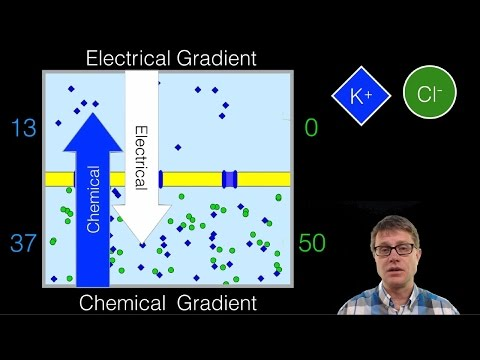

In [7]:
YouTubeVideo("Ba02v7eoVWQ", width=800, height=450)

The Nernst potential does not tell us about the voltage of the whole cell, called its *membrane potential*. But it is a crucial concept in determining the membrane potential. To get the full story on how all of the different ion species present in a cell work together to determine the membrane potential, we need to know about how ion channels conduct electric currents (called *ionic currents*) that can change the membrane potential by altering the distribution of charges on either side of the membrane.

## Ion Channels as Resistors

We won't get into the detailed biophysics of ion channels, but there are a few things we need to know about ion channels to be able to model neural activity. Though there are a few kinds of ion channels that are always open (able to pass ions) regardless of the state of the cell or the extracellular space, most are not. Typically, the conformation (shape) of the ion channel determines whether it is open or closed, and this conformation is in turn determined by other factors. The dynamics of these ion channel openings and closings shape the electrical activity of the cell, and therefore the electrical activity of the whole nervous system, thereby shaping the behavior of the organism.

Because ion channels allow ions, charge carriers, to pass through their pores and moving charges constitute an electrical current, we can analogize ion channels as resistors. But not just any resistors. As we already said, most ion channels are not open all the time, which means that their level of resistance (or conversely, conductance) can change. This means that ion channels are more like variable resistors, resistors whose resistance is a function of some variable such as temperature. In electrophysiology, we prefer to deal with conductance as opposed to resistance, for purely historical and conventional reasons. 

```{figure} ionres.png
:name: ionres

A depiction of ion channels as variable resistors (the arrow through the resistor is the symbol for a variable resistor).
```

In the next section, we will briefly cover the different kinds of ion channels and discuss how to model them mathematically as variable resistors.

### A Menagerie of Ion Channels

Ion channels vary not only in which ions they allow to pass through their pores, but also in the mechanisms by which they open and close. For any given ion species, there may be many different species of ion channel that conduct that ion, each channel having different electrical properties. There are several different kinds of mechanisms governing the opening and closing of ion channels:

* **Ligand gated:** These ion channels have a conformation that allows them to bind to certain molecules called *ligands*. Once a ligand has become bound to the ion channels, it will change its conformation, staying open and allowing ions to pass until the ligand has become unbound.

* **Mechanically gated:** These ion channels change conformation in response to mechanical deformations of the membrane. They remain open as long as those deformations persist past a particular threshold level.

* **Temperature gated:** These ion channels may detect cold or heat and change their conformation to open or closed whenever the temperature is past a particular threshold.

* **Voltage gated:** These types of ion channels are arguably the most important for rapidly altering the voltage of neurons (and therefore communication between them). They contain mechanisms for changing conformation to open (a process called *activation*) as well as changing conformation to closed (a process called *inactivation*) in response to changes in voltage.

```{figure} ionchan.png
:name: ionchan

A diagram of the some of the main types of ion channels.
```

Regardless of the mechanism by which an ion channel opens and closes, we can model all ion channels within the same framework. Our first step is to determine the conductance of the ion channel. Since we know that the conductance can change based on variables like temperature and voltage, we need to model the conductance not as a single value $g$, but as a function of those variables. Call the variables the ion channel species $j$ is sensitive to $x_1, x2, ..., x_n$. Then we can write the conductance as a function of these variables:

$$g_j(x_1, x_2, ..., x_n)$$

Now, we use Ohm's law ($I = gV = V/R$ or $V = IR$) to determine the *ionic current* of the ion channel species, $I_j$, through the channel at a given membrane potential $V_m$:

$$ I_j = g_j(x_1, x_2, ..., x_n)\left [V_m - E_j \right ]$$

where $E_j$ is the Nernst potential for the ion species conducted by ion channel species $j$. The reason we take the difference between the membrane potential and the Nernst potential is because there will be no net ion movement at the Nernst potential, so the magnitude and sign of the driving force acting to push ions through the ion channel pore is only non-zero when the membrane potential varies away from the Nernst potential. 

Now that we know about the Nernst potential and have seen how we can use it to calculate the ionic current through different species of ion channel at different voltages, we just need one more piece of the cell-to-circuit analogy before we can figure out the total membrane potential of a cell and how it changes in time.

## The Cell Membrane as Capacitor

As we have already seen, ions cannot pass through the membrane directly and require the help of ion channels. This means that charges can accumulate along either side of the membrane. Whenever a material, in this case the lipid bilayer of the cell membrane, serves as an insulating layer keeping charges apart, that material will behave like a capacitor. The capacitance of the cell membrane, that is, the amount of charge that needs to be distributed across the membrane in order for a certain voltage to be built up across it, is determined by the thickness of the membrane as well as other properties of the lipids forming the bilayer.

Sometimes we may be interested in the capacitance of the entire cell, but other times we may be interested in the capacitance of just a small patch of the membrane. In that case, we work with the *specific capacitance* $C_m$, the capacitance per square patch of the membrane, measured in microfarads per square centimeter of membrane ($\mu \text{F} / \text{cm}^2 $). The capacitance of whole membrane can be determined by multiplying $C_m$ by the surface area of the membrane.

```{figure} circuitcell.jpg
:name: circcell

The circuit model of the cell. Note that though the resistor is not shown as a variable resistor, it should be. The two horizontal bars of equal length are the symbol for a capacitorm while the horizontal bars of different length are the symbol for a voltage source.   
```

I said that the analogy between the cell membrane and a capacitor was the last piece of the puzzle that we needed to be able to model cellular electrical phenomena as measured by changes in the membrane potential. You may be disappointed to learn that this is not quite true. We need a bit of calculus under our belts before we can really get quantitative about it. However, I will end this chapter with a qualitative overview of the process.

If we can treat ion channels as resistors, then the geometry of the cell membrane means that they are all in parallel with each other. We know that the current through parallel resistors can be summed to determine the total current at the junction between the resistors. So the total ionic current leaving and entering the cell can be determined by summing all of the ionic currents together. Electric currents are all about moving charges. So as ions pass through ion channels, they change the distribution of charges on either side of the membrane. We already know an equation that relates charge to voltage, the capacitance equation:

$$ CV = Q $$

Stare at the equation for a while and see if you can figure out how it relates to the ionic currents we discussed earlier and how we can use that relation to determine the changing membrane potential of a cell.